In [1]:
from pokemon_env import *
from model import*
from es_agent import*

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Pokemon embeddings.

In [2]:
df = pd.read_csv('Data/pokemon_small_embeddings.csv')

In [3]:
df.head()

,Pokemon,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31
0,Bulbasaur,0.176876,0.024490,-0.506288,-1.252504,-1.479394,1.013380,1.186356,-1.309221,1.224058,...,-1.324177,0.834712,0.291582,-1.020162,-0.139150,2.126306,0.675927,1.204275,-0.110007,0.995182
1,Horsea,0.501605,-0.052334,-0.721622,-0.284430,0.922716,-1.268923,-1.893838,1.799177,0.071109,...,-1.853872,-1.109036,-0.516887,0.947678,0.320083,-0.539939,-1.217310,1.309489,-0.147258,-0.549346
2,Diglett,1.861715,0.625864,-0.376933,-0.962984,0.403147,0.963874,-1.215075,0.217034,-1.531598,...,-0.855032,-1.204082,2.021872,-1.172745,1.038530,0.759718,0.589223,0.217444,0.830931,-0.650673
3,Machop,-1.734448,0.911212,-0.010313,-1.150018,1.822839,-0.357089,0.690320,1.004881,-1.336256,...,1.821585,-0.924511,-0.581103,0.388137,0.542195,0.449241,-0.308982,-0.519000,0.895490,0.852862
4,Jynx,0.169774,-0.317828,2.083888,-0.104059,-0.441825,0.482504,-1.483912,0.656665,1.013320,...,0.250018,-0.571366,-1.275405,0.946374,0.116125,-1.345630,0.936227,1.057473,0.486862,-1.238626


Create the environment, and get the intial state s0 using a pool containing Charmander, and Bulbasaur.

In [4]:
env = PokemonEnv(num_battles=10, deterministic=False)
pool = ['Charmander','Bulbasaur']
env.build_pool(pool)
state = env.reset()
print(state)

[0.5, -0.5]


Simulate a battle using this pool.

In [5]:
env.battle(render=True)

Round 0
Charmander vs. Bulbasaur
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 1
Charmander vs. Bulbasaur
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 2
Charmander vs. Bulbasaur
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 3
Charmander vs. Bulbasaur
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Round 4
Charmander vs. Bulbasaur
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did no

(-1.0, [0.5, -0.5])

Define our NN model as well as our ES agent.

In [6]:
agent = Agent(env,df)

num_pokemon = len(env.pool)
embedding_size = len(agent.get_pokemon_embedding(list(env.pool.keys())[0]))
num_types = len(env.types)
num_moves = len(env.moves)

model = Model(num_pokemon*embedding_size,[128,64,32],[num_types-1,num_types,num_moves-1,num_moves])

Begin training.

In [7]:
# hyperparameters
npop = 10 # population size
sigma = 0.1 # noise standard deviation
alpha = 0.01 # learning rate
epochs_es = 120

ES_accuracies = []


w, model, avg_rewards = agent.find_solution(npop, sigma, alpha, ES_accuracies, epochs_es, num_pools=10)
model.parameters = utils.vector_to_parameters(w, model.parameters())

Episode:  0
[-0.5        -0.5275     -0.49333333 -0.51333333 -0.54416667 -0.4825
 -0.43833333 -0.4825     -0.36       -0.555     ]
Episode:  1
[-0.47666667 -0.61333333 -0.49666667 -0.5025     -0.54166667 -0.5575
 -0.49416667 -0.41083333 -0.37416667 -0.59333333]
Episode:  2
[-0.58583333 -0.50166667 -0.44333333 -0.64333333 -0.5        -0.59
 -0.55416667 -0.4525     -0.5275     -0.63583333]
Episode:  3
[-0.5025     -0.63583333 -0.49333333 -0.59583333 -0.42416667 -0.56083333
 -0.6025     -0.59083333 -0.67166667 -0.42166667]
Episode:  4
[-0.47416667 -0.42416667 -0.49166667 -0.5525     -0.5025     -0.54666667
 -0.485      -0.59833333 -0.465      -0.53166667]
Episode:  5
[-0.2775     -0.54916667 -0.61916667 -0.46583333 -0.37166667 -0.67416667
 -0.49416667 -0.46583333 -0.49166667 -0.53583333]
Episode:  6
[-0.5025     -0.60083333 -0.42416667 -0.48       -0.42166667 -0.42416667
 -0.51083333 -0.53       -0.51083333 -0.41333333]
Episode:  7
[-0.33833333 -0.36666667 -0.64583333 -0.51916667 -0.5075 

[-0.26583333 -0.15166667 -0.11       -0.255      -0.2575     -0.19083333
 -0.1825     -0.17916667 -0.19416667 -0.2325    ]
Episode:  63
[-0.215      -0.3325     -0.24416667 -0.26583333 -0.23833333 -0.38166667
 -0.27083333 -0.2325     -0.28583333 -0.36916667]
Episode:  64
[-0.35166667 -0.2325     -0.355      -0.3325     -0.20416667 -0.36583333
 -0.27083333 -0.20916667 -0.27916667 -0.33583333]
Episode:  65
[-0.305      -0.18       -0.13416667 -0.23       -0.27666667 -0.35833333
 -0.32666667 -0.23833333 -0.315      -0.29333333]
Episode:  66
[-0.37416667 -0.31       -0.17083333 -0.18416667 -0.2325     -0.19333333
 -0.12416667 -0.16583333 -0.30166667 -0.29833333]
Episode:  67
[-0.2975     -0.23083333 -0.14333333 -0.375      -0.13666667 -0.24333333
 -0.20166667 -0.04583333 -0.22666667 -0.26083333]
Episode:  68
[-0.14333333 -0.0875     -0.14666667 -0.17666667 -0.23416667 -0.24333333
 -0.28166667 -0.27333333 -0.2825     -0.22333333]
Episode:  69
[-0.28416667 -0.16583333 -0.12416667 -0.22583333

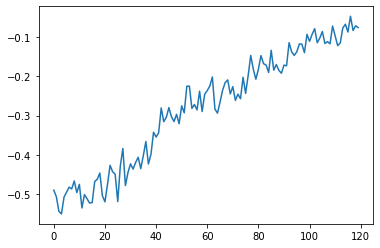

In [9]:
plt.plot(avg_rewards)

Print the agent-generated Pokemon for each matchup:

In [31]:
reward, arrelles = agent.f([['Bulbasaur','Charmander']], w)

print(reward)
print(arrelles[0].types)
print(arrelles[0].moves[0].name)
print(arrelles[0].moves[1].name)
print(arrelles[0].moves[2].name)
print(arrelles[0].moves[3].name)

0.0
['water', 'fighting']
scratch
low kick
sand attack
water gun


In [33]:
reward, arrelles = agent.f([['Pikachu','Squirtle']], w)

print(reward)
print(arrelles[0].types)
print(arrelles[0].moves[0].name)
print(arrelles[0].moves[1].name)
print(arrelles[0].moves[2].name)
print(arrelles[0].moves[3].name)

0.0
['ground', 'fighting']
psyshock
low kick
poison sting
water gun


In [36]:
reward, arrelles = agent.f([['Lapras','Pidgey']], w)

print(reward)
print(arrelles[0].types)
print(arrelles[0].moves[0].name)
print(arrelles[0].moves[1].name)
print(arrelles[0].moves[2].name)
print(arrelles[0].moves[3].name)

0.0
['water', 'fighting']
vine whip
low kick
poison sting
night shade


In [38]:
reward, arrelles = agent.f([['Diglett','Ekans']], w)

print(reward)
print(arrelles[0].types)
print(arrelles[0].moves[0].name)
print(arrelles[0].moves[1].name)
print(arrelles[0].moves[2].name)
print(arrelles[0].moves[3].name)

0.0
['fairy', 'fighting']
vine whip
low kick
poison sting
water gun


Check that our new Pokemon does indeed balance the pool.

In [39]:
reward, arrelles = agent.f([['Bulbasaur','Charmander']], w)
env.battle(render=True)

Round 0
Bulbasaur vs. Charmander
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Bulbasaur vs. Arrelle
Bulbasaur used vine whip
Its super effective!...
Arrelle used sand attack
It did normal damage...
Bulbasaur used vine whip
Its super effective!...
Bulbasaur won!

Charmander vs. Arrelle
Arrelle used water gun
Its super effective!...
Charmander used scratch
It did normal damage...
Arrelle used water gun
Its super effective!...
Arrelle won!

Round 1
Bulbasaur vs. Charmander
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Bulbasaur used tackle
It did normal damage...
Charmander used ember
Its super effective!...
Charmander won!

Bulbasaur vs. Arrelle
Arrelle used sand attack
It did normal damage...
Bulbasaur used vine whip
Its super effective!...
Arrelle used sand attack
It did normal damage...
Bulbasaur used vine whip
Its super effective!

(0.0, [0.0, 0.0, 0.0])